<a href="https://colab.research.google.com/github/romans01/Voice-synthesis/blob/master/Copy_of_voice_synthesis_example_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [2]:
# Remove TF2 in colab
!pip uninstall -y tensorflow

In [3]:
!git clone https://github.com/Fitnesstraker/Voice-synthesis.git

Cloning into 'Voice-synthesis'...
remote: Enumerating objects: 265, done.
remote: Counting objects: 100% (265/265), done.
remote: Compressing objects: 100% (210/210), done.
remote: Total 265 (delta 54), reused 241 (delta 39), pack-reused 0
Receiving objects: 100% (265/265), 3.17 MiB | 5.92 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [4]:
%cd Voice-synthesis/

/content/Voice-synthesis


In [5]:
# Download dependencies

!pip install -q -r requirements.txt
!apt-get install -qq libportaudio2

     |████████████████████████████████| 377.0MB 40kB/s 
     |████████████████████████████████| 686kB 48.6MB/s 
     |████████████████████████████████| 71kB 10.2MB/s 
     |████████████████████████████████| 245kB 57.1MB/s 
     |████████████████████████████████| 63.6MB 50kB/s 
     |████████████████████████████████| 491kB 62.2MB/s 
     |████████████████████████████████| 3.2MB 55.3MB/s 
     |████████████████████████████████| 204kB 52.6MB/s 
     |████████████████████████████████| 256kB 47.6MB/s 
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 144429 files and directories currently installed.)
Preparing to unpack .../libportaudio2_19.6.0-1_amd64.deb ...
Unpacking libportaudio2:amd64 (19.6.0-1) ...
Setting up libportaudio2:amd64 (19.6.0-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
/sbin/ldconfig.real: /usr/local/lib/python3.6/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [21]:
!gdown http://static.kremlin.ru/media/events/audio/ru/audio/vATbY1sV0jcjOxTAJTAjgiVgjfO0ATe8.mp3
!gdown https://drive.google.com/uc?id=1HkZvMXP8TTPJNKKE1qn-o0fSgUv7OQtF

Downloading...
From: http://static.kremlin.ru/media/events/audio/ru/audio/vATbY1sV0jcjOxTAJTAjgiVgjfO0ATe8.mp3
To: /content/Voice-synthesis/src/vATbY1sV0jcjOxTAJTAjgiVgjfO0ATe8.mp3
100% 6.32M/6.32M [00:00<00:00, 13.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1HkZvMXP8TTPJNKKE1qn-o0fSgUv7OQtF
To: /content/Voice-synthesis/src/6.-I.Phillips-WINNER.mp3
100% 331k/331k [00:00<00:00, 85.4MB/s]


In [7]:
# Download pretrained models

%cd src/
!gdown https://drive.google.com/uc?id=1qYAfU9_B7L91Tqo-YteQfHZp-rPUn47y
!unzip pretrained2.zip
%ls -l
%ls encoder -l

/content/Voice-synthesis/src
Downloading...
From: https://drive.google.com/uc?id=1qYAfU9_B7L91Tqo-YteQfHZp-rPUn47y
To: /content/Voice-synthesis/src/pretrained2.zip
384MB [00:01, 195MB/s]
Archive:  pretrained2.zip
   creating: encoder/saved_models/
  inflating: encoder/saved_models/pretrained.pt  
   creating: synthesizer/saved_models/
   creating: synthesizer/saved_models/logs-pretrained/
   creating: synthesizer/saved_models/logs-pretrained/taco_pretrained/
 extracting: synthesizer/saved_models/logs-pretrained/taco_pretrained/checkpoint  
  inflating: synthesizer/saved_models/logs-pretrained/taco_pretrained/tacotron_model.ckpt-278000.data-00000-of-00001  
  inflating: synthesizer/saved_models/logs-pretrained/taco_pretrained/tacotron_model.ckpt-278000.index  
  inflating: synthesizer/saved_models/logs-pretrained/taco_pretrained/tacotron_model.ckpt-278000.meta  
   creating: vocoder/saved_models/
   creating: vocoder/saved_models/pretrained/
  inflating: vocoder/saved_models/pretrained/

In [8]:
import uuid
import librosa
import IPython
import warnings

import numpy as np
import ipywidgets as widgets

from pathlib import Path
from base64 import b64decode
from IPython.utils import io
from google.colab import output
from IPython.display import Audio
from IPython.display import Javascript
from encoder import inference as encoder
from vocoder import inference as vocoder
from synthesizer.inference import Synthesizer

warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [0]:
# Don't actually need this for function calls, only for exemplar study

class InvokeButton(object):
  def __init__(self, title, callback):
    self._title = title
    self._callback = callback

  def _repr_html_(self):
    callback_id = 'button-' + str(uuid.uuid4())
    output.register_callback(callback_id, self._callback) # refer to https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Events.html for IPython events  

    template = """<button id="{callback_id}" style="cursor:pointer;background-color:#EEEEEE;border-color:#E0E0E0;padding:5px 15px;font-size:14px">{title}</button>
        <script>
          document.querySelector("#{callback_id}").onclick = (e) => {{
            google.colab.kernel.invokeFunction('{callback_id}', [], {{}})
            e.preventDefault();
          }};
        </script>"""
    html = template.format(title = self._title, callback_id = callback_id)
    return html

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec = 3):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  with open('audio.wav','wb+') as f:
    f.write(b)
  return 'audio.wav'

In [10]:
encoder_weights = Path("encoder/saved_models/pretrained.pt")
vocoder_weights = Path("vocoder/saved_models/pretrained/pretrained.pt")
syn_dir = Path("synthesizer/saved_models/logs-pretrained/taco_pretrained")
encoder.load_model(encoder_weights)
synthesizer = Synthesizer(syn_dir)
vocoder.load_model(vocoder_weights)

Loaded encoder "pretrained.pt" trained to step 1564501
Found synthesizer "pretrained" trained to step 278000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at vocoder/saved_models/pretrained/pretrained.pt


Now recording for 30 seconds, say what you will...


<IPython.core.display.Javascript object>

Audio recording complete
Preprocessing Audio ...
Preprocessing Audio step 2 ...


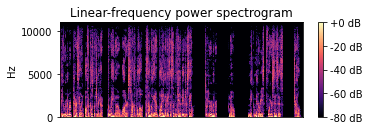

Preprocessing Audio step 3 ...
sampling_rate = 22050


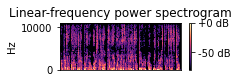

Preprocessing Audio step 4 ...
Synthesizing new audio...
synthesizer.sample_rate = 16000
{| ████████████████ 85500/86400 | Batch Size: 9 | Gen Rate: 11.7kHz | }

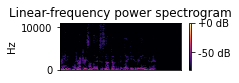

In [36]:
# Record in Ipython and display synthesized voice
def sh(y):
  import matplotlib.pyplot as plt
  import librosa.display
  y = y
  D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
  plt.subplot(4, 2, 1)
  #plt.display.specshow(D, y_axis='linear')
  librosa.display.specshow(D, y_axis='linear')
  plt.colorbar(format='%+2.0f dB')
  plt.title('Linear-frequency power spectrogram')  
  plt.show()

def synth():
  import matplotlib.pyplot as plt
  import librosa.display

  plt.figure(figsize=(12, 8))
  #text = "Can you understand me? You should know me very well. I am your boss last 20 years." # Text to be emulated by the speaker
  text = "Renaming directories on Linux is not done with a dedicated renaming command." # Text to be emulated by the speaker
  print("Now recording for 30 seconds, say what you will...")
  record(1)
  print("Audio recording complete")
  #in_fpath = Path("audio.wav") # Audio file to be synthesized, can be changed to audio file of choice, refer synthesizer.py
  #in_fpath = Path("../data/samuel_jackson.mp3") # Audio file to be synthesized, can be changed to audio file of choice, refer synthesizer.py  
  #in_fpath = Path("../data/honey_singh.mp3") # Audio file to be synthesized, can be changed to audio file of choice, refer synthesizer.py    
  #in_fpath = Path("../vATbY1sV0jcjOxTAJTAjgiVgjfO0ATe8.mp3") # Audio file to be synthesized, can be changed to audio file of choice, refer synthesizer.py    
  in_fpath = Path("6.-I.Phillips-WINNER.mp3") # Audio file to be synthesized, can be changed to audio file of choice, refer synthesizer.py    
  
  
  print("Preprocessing Audio ...")
  reprocessed_wav = encoder.preprocess_wav(in_fpath)
  print("Preprocessing Audio step 2 ...")
  original_wav, sampling_rate = librosa.load(in_fpath)

  sh(original_wav)  


  print("Preprocessing Audio step 3 ...")
  print("sampling_rate = "+str(sampling_rate))
  preprocessed_wav = encoder.preprocess_wav(original_wav, sampling_rate)
  sh(preprocessed_wav)
  print("Preprocessing Audio step 4 ...")
  #embed = encoder.embed_utterance(preprocessed_wav)
  embed = encoder.embed_utterance(preprocessed_wav)

  #synthesizer.sample_rate = 14000
  print("Synthesizing new audio...")
  print("synthesizer.sample_rate = "+str(synthesizer.sample_rate))
  with io.capture_output() as captured:
    specs = synthesizer.synthesize_spectrograms([text], [embed])
  generated_wav = vocoder.infer_waveform(specs[0])
  
  generated_wav = np.pad(generated_wav, (0, synthesizer.sample_rate), mode="constant")
  display(Audio(generated_wav, rate=synthesizer.sample_rate))
  sh(generated_wav)
  
synth()
#InvokeButton('Start recording', synth)